In [1]:
# dataset downloaded from: https://cocodataset.org/#download
# https://www.kaggle.com/code/armanasgharpoor1993/coco-dataset-tutorial-image-segmentation
# reference: https://github.com/matterport/Mask_RCNN
# reference: https://machinelearningmastery.com/how-to-perform-object-detection-in-photographs-with-mask-r-cnn-in-keras/

import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors
import seaborn as sns
import numpy as np
import torchvision
from torchvision import  transforms
import cv2
import torch

from random import shuffle
from PIL import Image

from pycocotools.coco import COCO

In [2]:
dataDir='data'
dataType='val2014'
annFile='/Users/ashleycui/code/dev/deep_learning_project/src/week3/task1/coco/annotations_trainval/instances_val2014.json'.format(dataDir,dataType)
imageDir = '/Users/ashleycui/code/dev/deep_learning_project/src/week3/task1/coco/data/val2014/'.format(dataDir, dataType)

# Initialize the COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=3.61s)
creating index...
index created!


In [3]:
ids = 1
cats = coco.loadCats(ids=ids)
print(cats)

[{'supercategory': 'person', 'id': 1, 'name': 'person'}]


In [4]:
category_ids = coco.getCatIds()
num_categories = len(category_ids)
print('number of categories: ',num_categories)
for ids in category_ids:
    cats = coco.loadCats(ids=ids)
    print(cats)

number of categories:  80
[{'supercategory': 'person', 'id': 1, 'name': 'person'}]
[{'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}]
[{'supercategory': 'vehicle', 'id': 3, 'name': 'car'}]
[{'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}]
[{'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}]
[{'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}]
[{'supercategory': 'vehicle', 'id': 7, 'name': 'train'}]
[{'supercategory': 'vehicle', 'id': 8, 'name': 'truck'}]
[{'supercategory': 'vehicle', 'id': 9, 'name': 'boat'}]
[{'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}]
[{'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'}]
[{'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'}]
[{'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'}]
[{'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}]
[{'supercategory': 'animal', 'id': 16, 'name': 'bird'}]
[{'supercategory': 'animal', 'id': 17, 'name': 'cat'}]
[{'supercategory': 'animal',

In [5]:
image_ids = coco.getImgIds()
image_id = image_ids[0]  # Change this line to display a different image
image_info = coco.loadImgs(image_id)
print(image_info)

[{'license': 3, 'file_name': 'COCO_val2014_000000391895.jpg', 'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000391895.jpg', 'height': 360, 'width': 640, 'date_captured': '2013-11-14 11:18:45', 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg', 'id': 391895}]


In [6]:
annotation_ids = coco.getAnnIds(imgIds=image_id)
annotations = coco.loadAnns(annotation_ids)
print(annotations)

[{'segmentation': [[376.97, 176.91, 398.81, 176.91, 396.38, 147.78, 447.35, 146.17, 448.16, 172.05, 448.16, 178.53, 464.34, 186.62, 464.34, 192.28, 448.97, 195.51, 447.35, 235.96, 441.69, 258.62, 454.63, 268.32, 462.72, 276.41, 471.62, 290.98, 456.25, 298.26, 439.26, 292.59, 431.98, 308.77, 442.49, 313.63, 436.02, 316.86, 429.55, 322.53, 419.84, 354.89, 402.04, 359.74, 401.24, 312.82, 370.49, 303.92, 391.53, 299.87, 391.53, 280.46, 385.06, 278.84, 381.01, 278.84, 359.17, 269.13, 373.73, 261.85, 374.54, 256.19, 378.58, 231.11, 383.44, 205.22, 385.87, 192.28, 373.73, 184.19]], 'area': 12190.44565, 'iscrowd': 0, 'image_id': 391895, 'bbox': [359.17, 146.17, 112.45, 213.57], 'category_id': 4, 'id': 151091}, {'segmentation': [[352.55, 146.82, 353.61, 137.66, 356.07, 112.66, 357.13, 94.7, 357.13, 84.49, 363.12, 73.92, 370.16, 68.64, 370.16, 66.53, 368.4, 63.71, 368.05, 54.56, 361.0, 53.85, 356.07, 50.33, 356.43, 46.46, 364.17, 42.23, 369.1, 35.89, 371.22, 30.96, 376.85, 26.39, 383.54, 22.16, 

In [7]:
# Get category ids that satisfy the given filter conditions
filterClasses = ['laptop', 'tv', 'cell phone']
# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses)
print(catIds)

[72, 73, 77]


In [8]:
# Load category information for the given ID
catID = 15
print(coco.loadCats(ids=catID))

# Get image ID that satisfies the given filter conditions
imgId = coco.getImgIds(catIds=[catID])[0]
print(imgId)

[{'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}]
262148


In [9]:
ann_ids = coco.getAnnIds(imgIds=[imgId], iscrowd=None)
print(ann_ids)

[247584, 576412, 642663, 1209372, 1251030, 1272930, 1277823, 1303789, 1307874, 1312222, 1312550, 1321181, 1324108, 1331011, 1332687, 1371763, 1372845, 1422576, 1837952, 1962686, 2007683, 2061640, 900100262148]


In [2]:
def get_predictions(pred, threshold=0.8, objects=None):
    """
    This function will assign a string name to a predicted class and eliminate predictions whose likelihood  is under a threshold 
    
    pred: a list where each element contains a tuple that corresponds to information about  the different objects; Each element includes a tuple with the class yhat, probability of belonging to that class and the coordinates of the bounding box corresponding to the object 
    image : frozen surface
    predicted_classes: a list where each element contains a tuple that corresponds to information about  the different objects; Each element includes a tuple with the class name, probability of belonging to that class and the coordinates of the bounding box corresponding to the object 
    thre
    """

    predicted_classes= [(COCO_INSTANCE_CATEGORY_NAMES[i],p,[(box[0], box[1]), (box[2], box[3])]) for i,p,box in zip(list(pred[0]['labels'].numpy()),pred[0]['scores'].detach().numpy(),list(pred[0]['boxes'].detach().numpy()))]
    predicted_classes=[  stuff  for stuff in predicted_classes  if stuff[1]>threshold ]

    if objects  and predicted_classes :
        predicted_classes=[ (name, p, box) for name, p, box in predicted_classes if name in  objects ]
    return predicted_classes

# COCO_INSTANCE_CATEGORY_NAMES = [
#     '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
#     'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
#     'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
#     'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
#     'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
#     'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
#     'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
#     'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
#     'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
#     'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
#     'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
#     'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
# ]
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table',
    'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]
for i, n in enumerate(COCO_INSTANCE_CATEGORY_NAMES):
    print(f'{i}, {n}')
    
len(COCO_INSTANCE_CATEGORY_NAMES)

def draw_box(pred_class, img, rect_th=2, text_size=0.5, text_th=2, download_image=False, img_name="img"):
    """
    draws box around each object 
    
    predicted_classes: a list where each element contains a tuple that corresponds to information about the different objects; Each element includes a tuple with the class name, probability of belonging to that class and the coordinates of the bounding box corresponding to the object 
    image : frozen surface 
   
    """
    image = (np.clip(cv2.cvtColor(np.clip(img.numpy().transpose((1, 2, 0)), 0, 1), cv2.COLOR_RGB2BGR), 0, 1) * 255).astype(np.uint8).copy()

    for predicted_class in pred_class:

        label=predicted_class[0]
        probability=predicted_class[1]
        box=predicted_class[2]
        t = round(box[0][0].tolist())
        l = round(box[0][1].tolist())
        r = round(box[1][0].tolist())
        b = round(box[1][1].tolist())

        # Giving brief information about rectange, class and probability.
        from colorama import Fore
        from colorama import Style
        print(f"\nLabel: {Fore.GREEN}{label}{Style.RESET_ALL}")
        print(f"Box coordinates: {t}, {l}, {r}, {b}")
        print(f"Probability: {probability}")

        # Drawing rectangle and adding text on the picture based on their class and size.
        cv2.rectangle(image, (t, l), (r, b), (0, 255, 0), rect_th)
        cv2.rectangle(image, (t, l), (t+110, l+17), (255, 255, 255), -1)
        cv2.putText(image, label, (t+10, l+12),  cv2.FONT_HERSHEY_SIMPLEX,
                    text_size, (0,255,0), thickness=text_th)
        cv2.putText(image, label+": "+str(round(probability, 2)),
                    (t+10, l+12),  cv2.FONT_HERSHEY_SIMPLEX, text_size,
                    (0, 255, 0),thickness=text_th)

    # Plotting image
    image = np.array(image)
    plt.figure(figsize=(15, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # if download_image:
    #     plt.savefig(f'{img_name}.png')
    # else:
    #     pass
    plt.show()

    del(img)
    del(image)

0, __background__
1, person
2, bicycle
3, car
4, motorcycle
5, airplane
6, bus
7, train
8, truck
9, boat
10, traffic light
11, fire hydrant
12, stop sign
13, parking meter
14, bench
15, bird
16, cat
17, dog
18, horse
19, sheep
20, cow
21, elephant
22, bear
23, zebra
24, giraffe
25, backpack
26, umbrella
27, handbag
28, tie
29, suitcase
30, frisbee
31, skis
32, snowboard
33, sports ball
34, kite
35, baseball bat
36, baseball glove
37, skateboard
38, surfboard
39, tennis racket
40, bottle
41, wine glass
42, cup
43, fork
44, knife
45, spoon
46, bowl
47, banana
48, apple
49, sandwich
50, orange
51, broccoli
52, carrot
53, hot dog
54, pizza
55, donut
56, cake
57, chair
58, couch
59, potted plant
60, bed
61, dining table
62, toilet
63, tv
64, laptop
65, mouse
66, remote
67, keyboard
68, cell phone
69, microwave
70, oven
71, toaster
72, sink
73, refrigerator
74, book
75, clock
76, vase
77, scissors
78, teddy bear
79, hair drier
80, toothbrush


/Users/ashleycui/miniconda3/envs/tf2/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/ashleycui/miniconda3/envs/tf2/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/Users/ashleycui/miniconda3/envs/tf2/lib/python3.11/site-packages/torchvision/transforms/functional.py:154: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the 


Label: person
Box coordinates: 248, 69, 404, 349
Probability: 0.9986812472343445

Label: person
Box coordinates: 149, 249, 174, 349
Probability: 0.9946357607841492

Label: person
Box coordinates: 419, 253, 453, 341
Probability: 0.9903430938720703

Label: person
Box coordinates: 199, 248, 235, 349
Probability: 0.9895820617675781

Label: person
Box coordinates: 451, 252, 480, 340
Probability: 0.9840074181556702

Label: person
Box coordinates: 388, 257, 416, 340
Probability: 0.9839263558387756

Label: person
Box coordinates: 181, 254, 206, 347
Probability: 0.9703980684280396

Label: person
Box coordinates: 319, 253, 339, 339
Probability: 0.9584209322929382

Label: person
Box coordinates: 291, 251, 329, 347
Probability: 0.9470208287239075

Label: person
Box coordinates: 228, 248, 257, 347
Probability: 0.9212281703948975

Label: person
Box coordinates: 474, 260, 491, 340
Probability: 0.9033806324005127

Label: person
Box coordinates: 250, 253, 275, 347
Probability: 0.8661331534385681


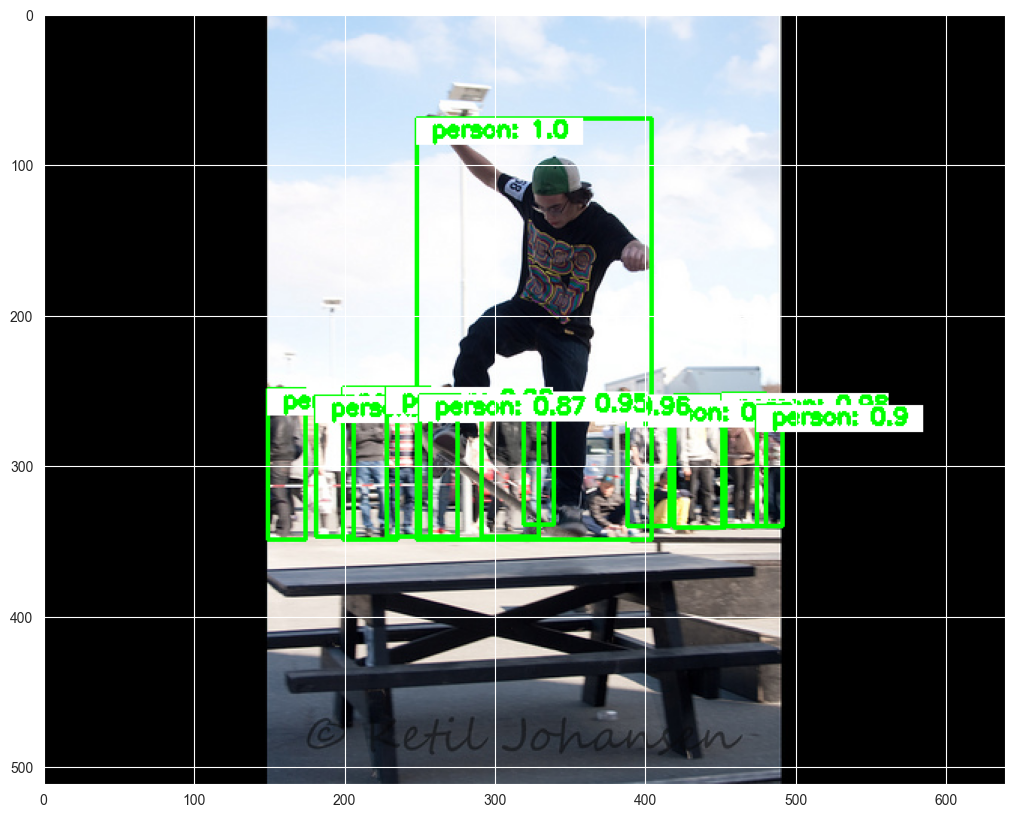

In [11]:
# maskrcnn_resnet50_fpn
# fasterrcnn_resnet50_fpn
model_ = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model_.eval()

for name, param in model_.named_parameters():
    param.requires_grad = False

def model(x):
    with torch.no_grad():
        yhat = model_(x)
    return yhat

img_path='trucktaxi.jpg'
half = 0.5
# image = Image.open(img_path)
image_path = coco.loadImgs(imgId)[0]['file_name']
image = plt.imread(imageDir + image_path)
transform = transforms.Compose([transforms.ToTensor()])
img = transform(image)

pred = model([img])
pred_class=get_predictions(pred, objects="person")
draw_box(pred_class, img)

Annotations for Image ID 262148:
COCO_val2014_000000262148.jpg


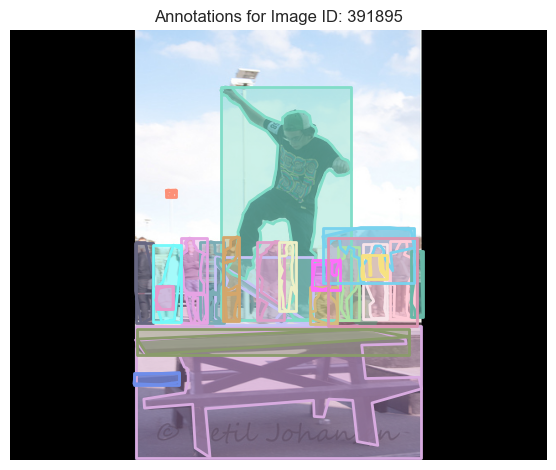

In [12]:
print(f"Annotations for Image ID {imgId}:")
anns = coco.loadAnns(ann_ids)

image_path = coco.loadImgs(imgId)[0]['file_name']
print(image_path)
image = plt.imread(imageDir + image_path)
plt.imshow(image)

# Display the specified annotations
coco.showAnns(anns, draw_bbox=True)

plt.axis('off')
plt.title('Annotations for Image ID: {}'.format(image_id))
plt.tight_layout()
plt.show()

Number of Unique Categories: 80
Category IDs:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90]
Categories Names:
['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted

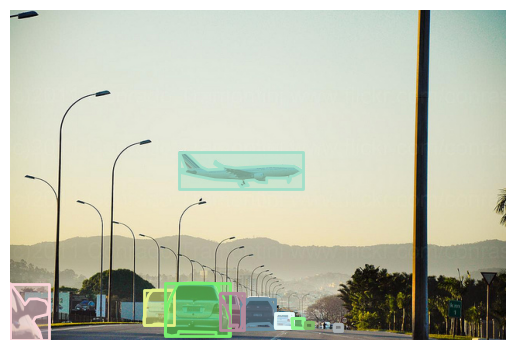

In [13]:
def main():

    # Category IDs.
    cat_ids = coco.getCatIds()
    print(f"Number of Unique Categories: {len(cat_ids)}")
    print("Category IDs:")
    print(cat_ids)  # The IDs are not necessarily consecutive.

    # All categories.
    cats = coco.loadCats(cat_ids)
    cat_names = [cat["name"] for cat in cats]
    print("Categories Names:")
    print(cat_names)

    # Category ID -> Category Name.
    query_id = cat_ids[0]
    query_annotation = coco.loadCats([query_id])[0]
    query_name = query_annotation["name"]
    query_supercategory = query_annotation["supercategory"]
    print("Category ID -> Category Name:")
    print(
        f"Category ID: {query_id}, Category Name: {query_name}, Supercategory: {query_supercategory}"
    )

    # Category Name -> Category ID.
    query_name = cat_names[2]
    query_id = coco.getCatIds(catNms=[query_name])[0]
    print("Category Name -> ID:")
    print(f"Category Name: {query_name}, Category ID: {query_id}")

    # Get the ID of all the images containing the object of the category.
    img_ids = coco.getImgIds(catIds=[query_id])
    print(f"Number of Images Containing {query_name}: {len(img_ids)}")

    # Pick one image.
    img_id = img_ids[2]
    img_info = coco.loadImgs([img_id])[0]
    img_file_name = img_info["file_name"]
    img_url = img_info["coco_url"]
    print(
        f"Image ID: {img_id}, File Name: {img_file_name}, Image URL: {img_url}"
    )

    # Get all the annotations for the specified image.
    ann_ids = coco.getAnnIds(imgIds=[img_id], iscrowd=None)
    anns = coco.loadAnns(ann_ids)
    print(f"Annotations for Image ID {img_id}:")
    print(anns)

    # Use URL to load image.
    # im = Image.open(requests.get(img_url, stream=True).raw)
    # Load image from dataset
    im = plt.imread(imageDir+ coco.loadImgs(img_id)[0]['file_name'])
    # Save image and its labeled version.
    plt.axis("off")
    plt.imshow(np.asarray(im))
    # plt.savefig(f"{img_id}.jpg", bbox_inches="tight", pad_inches=0)
    # Plot segmentation and bounding box.
    coco.showAnns(anns, draw_bbox=True)
    # plt.savefig(f"{img_id}_annotated.jpg", bbox_inches="tight", pad_inches=0)
    plt.show()
    return


if __name__ == "__main__":

    main()

/var/folders/3n/8vjcl67s5l356fzzl5k2qh7c0000gn/T/ipykernel_41849/3803289904.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts, y=category_names, palette=colors)


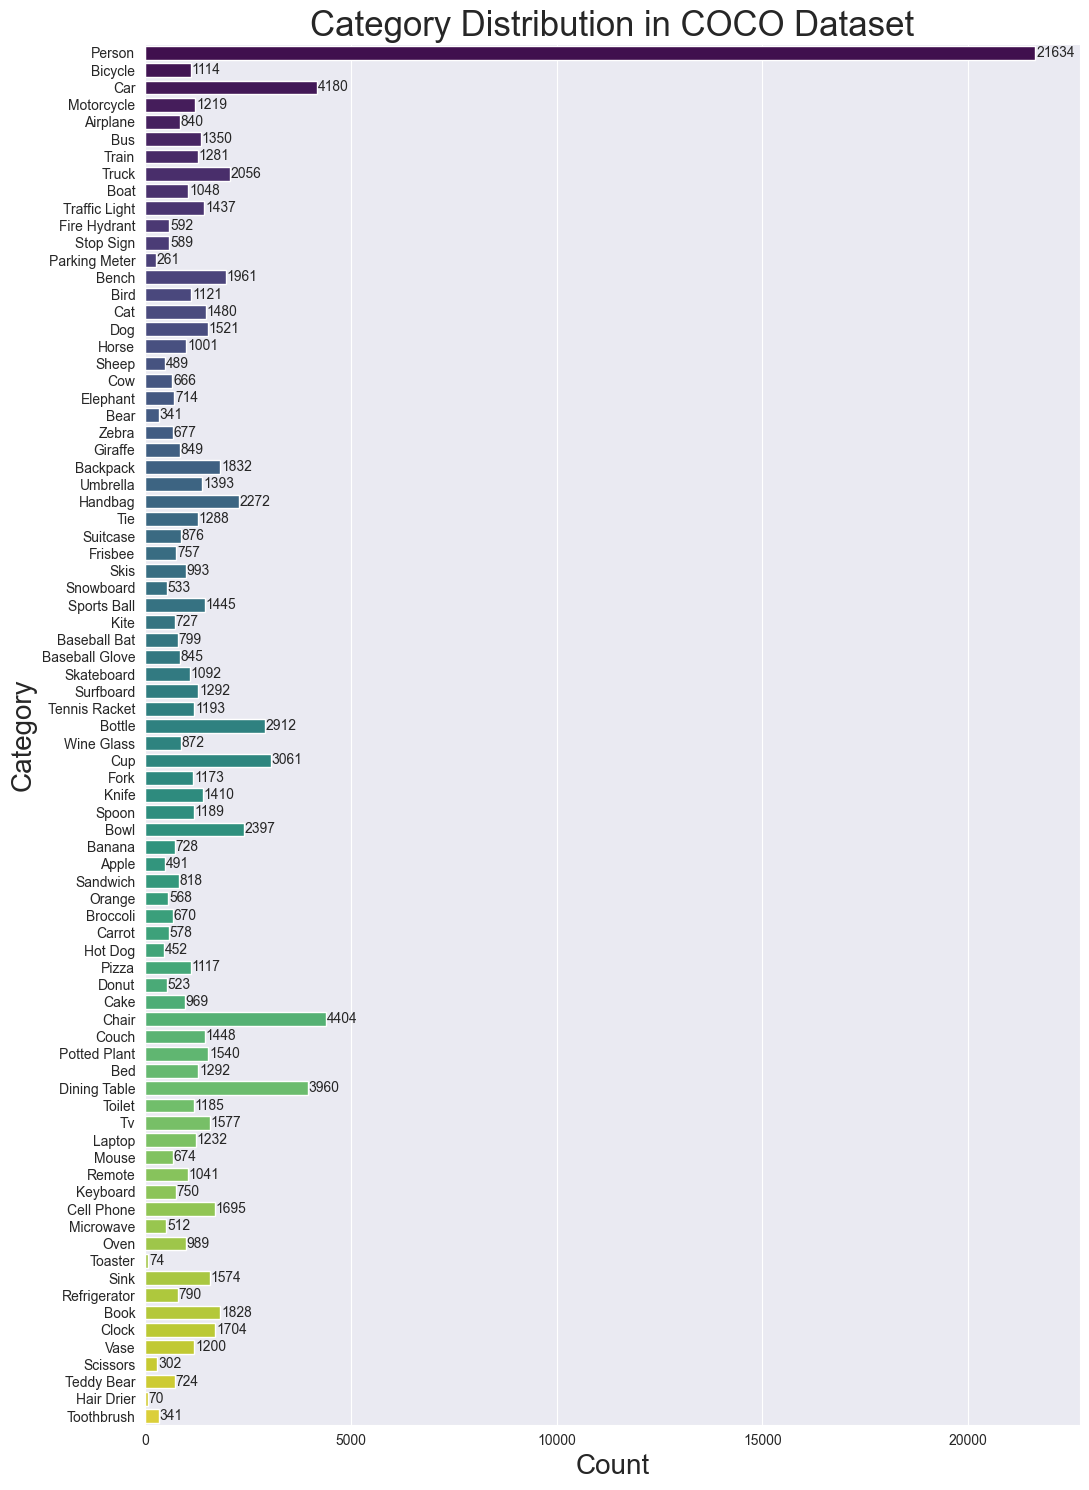

In [14]:
# Load the categories in a variable
catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)

# Get category names
category_names = [cat['name'].title() for cat in cats]

# Get category counts
category_counts = [coco.getImgIds(catIds=[cat['id']]) for cat in cats]
category_counts = [len(img_ids) for img_ids in category_counts]


# Create a color palette for the plot
colors = sns.color_palette('viridis', len(category_names))

# Create a horizontal bar plot to visualize the category counts
plt.figure(figsize=(11, 15))
sns.barplot(x=category_counts, y=category_names, palette=colors)

# Add value labels to the bars
for i, count in enumerate(category_counts):
    plt.text(count + 20, i, str(count), va='center')
plt.xlabel('Count',fontsize=20)
plt.ylabel('Category',fontsize=20)
plt.title('Category Distribution in COCO Dataset',fontsize=25)
plt.tight_layout()
# plt.savefig('coco-cats.png',dpi=300)
plt.show()

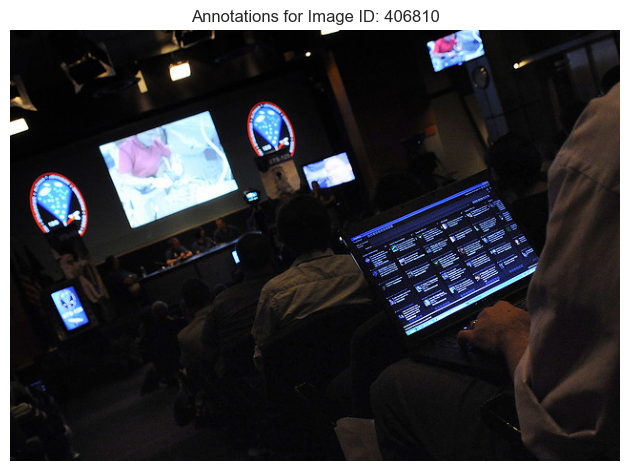

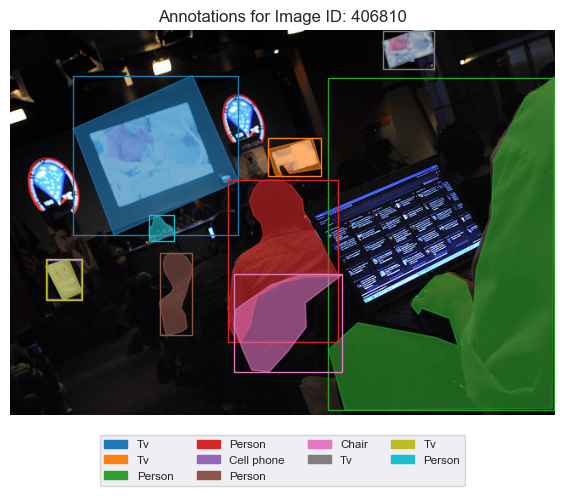

In [15]:
# Define the classes (out of the 80) which you want to see. Others will not be shown.
filterClasses = ['laptop', 'tv', 'cell phone']

# Fetch class IDs only corresponding to the filterClasses
catIds = coco.getCatIds(catNms=filterClasses)

# Get all images containing the above Category IDs
imgIds = coco.getImgIds(catIds=catIds)

# Load a random image from the filtered list
if len(imgIds) > 0:
    image_id = imgIds[np.random.randint(len(imgIds))]  # Select a random image ID
    image_info = coco.loadImgs(image_id)

    if image_info is not None and len(image_info) > 0:
        image_info = image_info[0]
        image_path = imageDir + image_info['file_name']

        # Load the annotations for the image
        annotation_ids = coco.getAnnIds(imgIds=image_id)
        annotations = coco.loadAnns(annotation_ids)

        # Get category names and assign colors for annotations
        category_names = [coco.loadCats(ann['category_id'])[0]['name'].capitalize() for ann in annotations]
        category_colors = list(matplotlib.colors.TABLEAU_COLORS.values())

        # Load the image and plot it
        image = plt.imread(image_path)
        plt.imshow(image)
        plt.axis('off')
        plt.title('Annotations for Image ID: {}'.format(image_id))
        plt.tight_layout()
        # plt.savefig('Img.png',dpi=350)
        plt.show()

        plt.imshow(image)
        plt.axis('off')

        # Display bounding boxes and segmented colors for each annotation
        for ann, color in zip(annotations, category_colors):
            bbox = ann['bbox']
            segmentation = ann['segmentation']

            # Display bounding box
            rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1,
                                     edgecolor=color, facecolor='none')
            plt.gca().add_patch(rect)

            # Display segmentation masks with assigned colors
            for seg in segmentation:
                poly = np.array(seg).reshape((len(seg) // 2, 2))
                plt.fill(poly[:, 0], poly[:, 1], color=color, alpha=0.6)

        # Create a legend with category names and colors
        legend_patches = [patches.Patch(color=color, label=name) for color, name in zip(category_colors, category_names)]
        plt.legend(handles=legend_patches, loc="lower center", ncol=4, bbox_to_anchor=(0.5, -0.2), fontsize='small')

        # Show the image with legend
        plt.title('Annotations for Image ID: {}'.format(image_id))
        plt.tight_layout()
        # plt.savefig('annImg.png',dpi=350)
        plt.show()
    else:
        print("No image information found for the selected image ID.")
else:
    print("No images found for the desired classes.")

In [16]:
# Extracting Mask Information
# Load annotations for a specific image ID
# Load images for the given ids
image_ids = coco.getImgIds()
image_id = image_ids[0]
annotations = coco.loadAnns(coco.getAnnIds(imgIds=image_id))

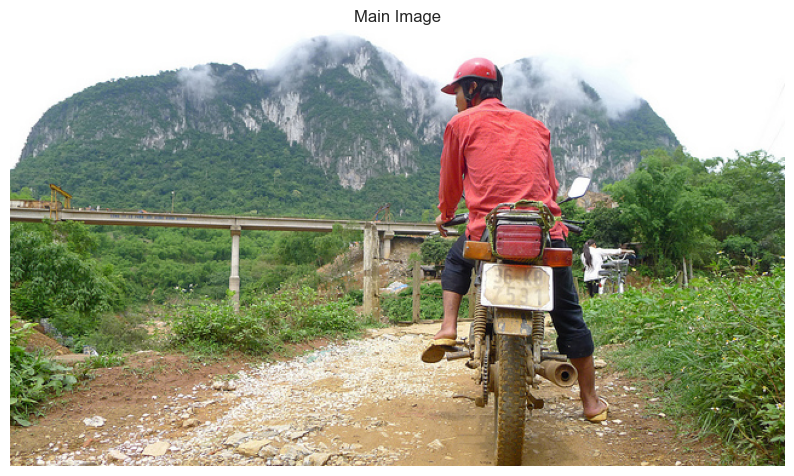

In [17]:
# Retrieve image file path
image_info = coco.loadImgs(image_id)[0]
image_dir = os.path.join('coco', 'data', 'val2014')
image_path = os.path.join(image_dir, image_info['file_name'])

# Load the main image
main_image = plt.imread(image_path)

# Create a new figure for displaying the main image
plt.figure(figsize=(10, 10))
plt.imshow(main_image)
plt.axis('off')
plt.title('Main Image')

# Save the figures
# plt.savefig('main_image.png', dpi=300)

# Show the plots
plt.show()

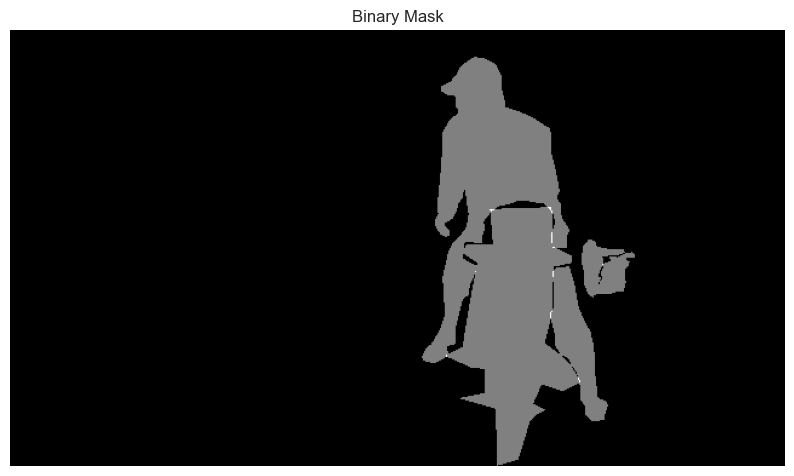

In [18]:
# Retrieve image dimensions
image_info = coco.loadImgs(image_id)[0]
height, width = image_info['height'], image_info['width']

# Create an empty binary mask with the same dimensions as the image
binary_mask = np.zeros((height, width), dtype=np.uint8)

# Iterate through the annotations and draw the binary masks
for annotation in annotations:
    segmentation = annotation['segmentation']
    mask = coco.annToMask(annotation)

    # Add the mask to the binary mask
    binary_mask += mask

# Display the binary mask
plt.figure(figsize=(10,10))
plt.imshow(binary_mask, cmap='gray')
plt.axis('off')
plt.title('Binary Mask')
# plt.savefig('binary_mask.png', dpi=300)
plt.show()

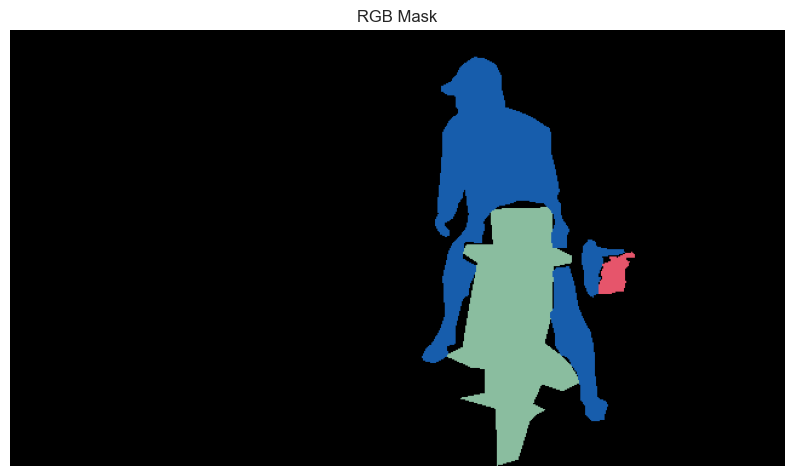

In [19]:
# Retrieve image dimensions
image_info = coco.loadImgs(image_id)[0]
height, width = image_info['height'], image_info['width']

# Create an empty RGB mask with the same dimensions as the image
rgb_mask = np.zeros((height, width, 3), dtype=np.uint8)

# Define a color map for different object classes
color_map = {cat['id']: (np.random.randint(0, 256), np.random.randint(0, 256), np.random.randint(0, 256))
             for cat in coco.loadCats(catIDs)}

# Iterate through the annotations and assign unique colors to each class/object
for annotation in annotations:
    category_id = annotation['category_id']
    color = color_map[category_id]

    # Draw the mask on the RGB mask
    mask = coco.annToMask(annotation)
    rgb_mask[mask == 1] = color

# Display the RGB mask
plt.figure(figsize=(10,10))
plt.imshow(rgb_mask)
plt.axis('off')
plt.title('RGB Mask')
# plt.savefig('rgb_mask.png', dpi=300)
plt.show()

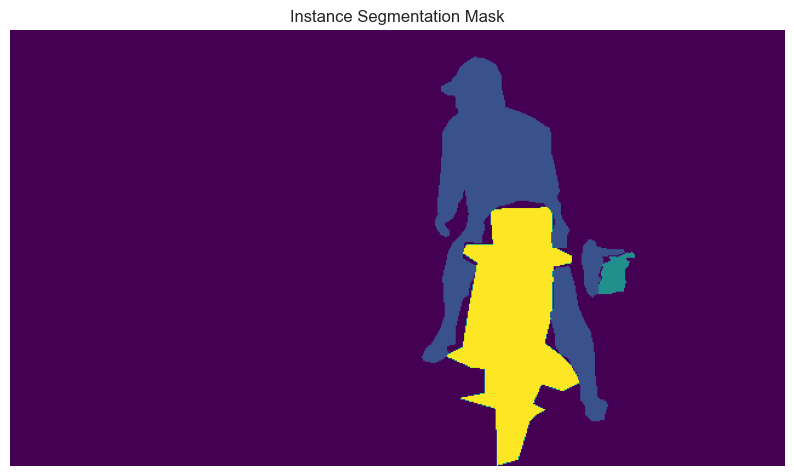

In [20]:
# Retrieve image dimensions
image_info = coco.loadImgs(image_id)[0]
height, width = image_info['height'], image_info['width']

# Create an empty mask with the same dimensions as the image
instance_mask = np.zeros((height, width), dtype=np.uint8)

# Iterate through the annotations and draw the instance segmentation masks
for annotation in annotations:
    segmentation = annotation['segmentation']
    mask = coco.annToMask(annotation)
    category_id = annotation['category_id']

    # Assign a unique value to each instance mask
    instance_mask[mask == 1] = category_id

# Display the instance segmentation mask
plt.figure(figsize=(10,10))
plt.imshow(instance_mask, cmap='viridis')
plt.axis('off')
plt.title('Instance Segmentation Mask')
# plt.savefig('instance_mask.png', dpi=300)
plt.show()

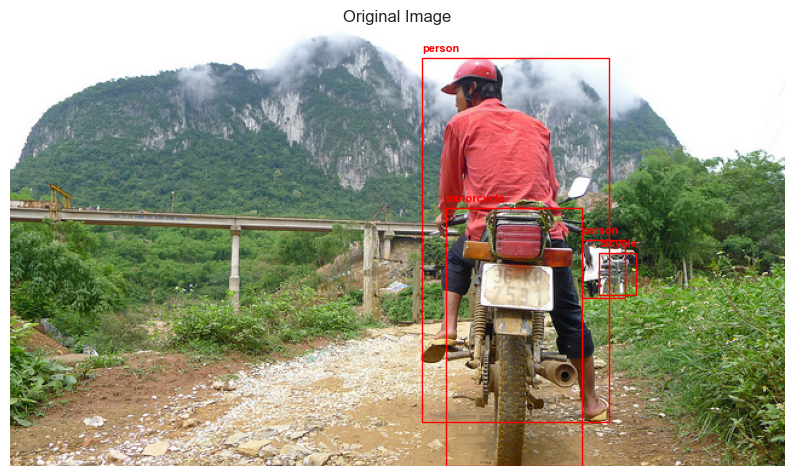

In [21]:
# Retrieve image dimensions
image_info = coco.loadImgs(image_id)[0]
height, width = image_info['height'], image_info['width']

# Create a new figure with the same dimensions as the image
fig, ax = plt.subplots(figsize=(10,10), dpi=100)

# Display the original image
ax.imshow(main_image)
ax.axis('off')
ax.set_title('Original Image')

# Draw bounding boxes on the original image
for annotation in annotations:
    bbox = annotation['bbox']
    category_id = annotation['category_id']
    category_name = coco.loadCats(category_id)[0]['name']

    # Convert COCO bounding box format (x, y, width, height) to matplotlib format (xmin, ymin, xmax, ymax)
    xmin, ymin, width, height = bbox
    xmax = xmin + width
    ymax = ymin + height

    # Draw the bounding box rectangle
    rect = patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor='red', facecolor='none')
    ax.add_patch(rect)

    # Add the category name as a label above the bounding box
    ax.text(xmin, ymin - 5, category_name, fontsize=8, color='red', weight='bold')

# Save the figure with adjusted dimensions
# plt.savefig('bounding_boxes.png', bbox_inches='tight')

# Show the plot
plt.show()

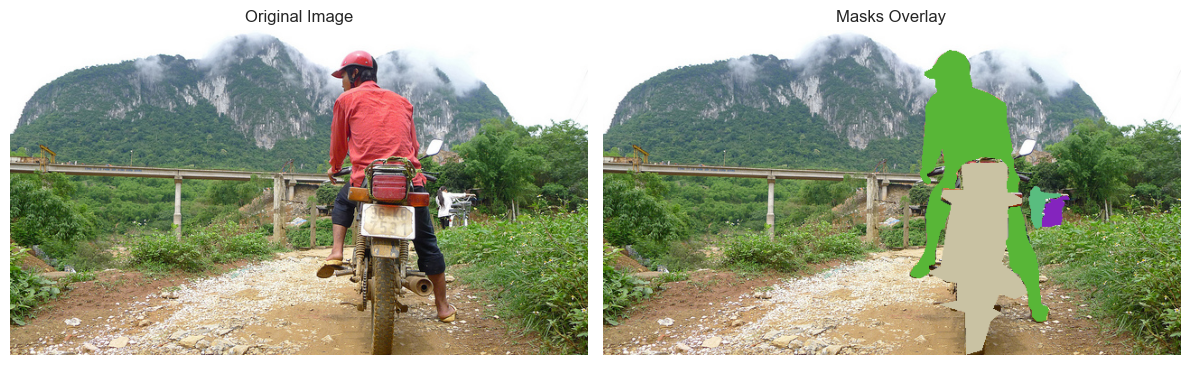

In [22]:
# Select an image ID for visualization
image_id = image_ids[0]

# Load the image
image_info = coco.loadImgs(image_id)[0]
image_path = os.path.join(imageDir, image_info['file_name'])
image = plt.imread(image_path)

# Get the ground truth annotations for the image
annotation_ids = coco.getAnnIds(imgIds=image_id)
annotations = coco.loadAnns(annotation_ids)

# Create a blank image for overlaying the masks
overlay = image.copy()

# Iterate over the annotations and draw the masks on the overlay image
for annotation in annotations:
    # Get the segmentation mask
    mask = coco.annToMask(annotation)

    # Choose a random color for the mask
    color = np.random.randint(0, 256, size=(3,), dtype=np.uint8)

    # Apply the mask to the overlay image
    overlay[mask == 1] = color

# Create a figure and subplot for visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original image
ax1.imshow(image)
ax1.set_title('Original Image')
ax1.axis('off')

# Plot the image with overlay masks
ax2.imshow(overlay)
ax2.set_title('Masks Overlay')
ax2.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Save the visualization as an image file
# plt.savefig('mask_visualization.png', dpi=300)

# Show the plot
plt.show()

In [39]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

labels = ['Horse', 'Tiger', 'Cat', 'Dog', 'Polar bear']
print(labels)

y_true = np.random.randint(low=0, high=5, size=100, dtype=int)
print(y_true)

['Horse', 'Tiger', 'Cat', 'Dog', 'Polar bear']
[3 3 2 1 4 2 4 4 0 4 3 2 0 1 4 0 2 4 4 0 0 3 0 3 1 0 0 1 3 2 1 1 2 3 0 4 1
 2 4 0 3 4 0 3 3 1 4 0 4 4 3 0 2 0 4 0 1 4 1 2 1 1 4 0 3 4 4 4 3 4 2 3 4 3
 3 3 3 0 1 1 4 0 0 1 0 1 1 3 4 1 1 4 0 1 2 1 0 3 4 4]


classes indexes: [0 1 2 3 4]


classes frequency: [22 21 11 20 26]


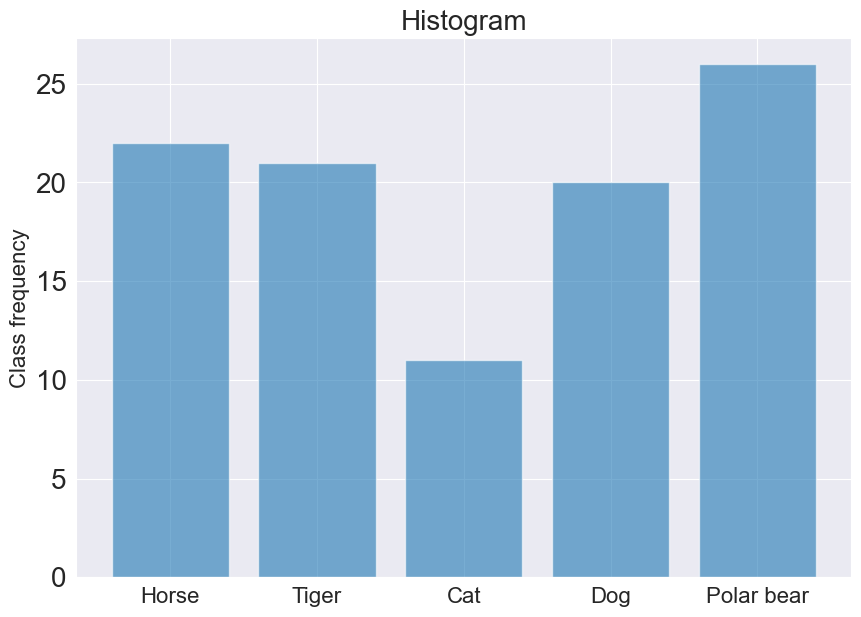

In [41]:
classesIndexes, classesFrequency = np.unique(y_true, return_counts=True)


# Printing frequency (number of samples) for every class
print('classes indexes:' , classesIndexes)
print('\n')
print('classes frequency:', classesFrequency)

# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline
# Setting default size of the plot
plt.rcParams['figure.figsize'] = (10.0, 7.0)
# Plotting histogram of 5 classes with their number of samples
# Defining a figure object 
figure = plt.figure()
# Plotting Bar chart
plt.bar(classesIndexes, classesFrequency, align='center', alpha=0.6)
# Giving name to Y axis
plt.ylabel('Class frequency', fontsize=16)
# Giving names to every Bar along X axis
plt.xticks(classesIndexes, labels, fontsize=16)
# Giving name to the plot
plt.title('Histogram', fontsize=20)
# Saving the plot
figure.savefig('histogram.png', transparent=True, dpi=500)
# Showing the plot
plt.show()

In [43]:
# Making copy of array with True classes' indexes
y_predicted = np.copy(y_true)

# Choosing randomly 25% of classes to be changed
ii = np.random.randint(low=0, high=len(y_true), size=int(0.25 * len(y_true)), dtype=int)
# Check point
# Showing chosen indexes
print(ii)

# Iterating chosen indexes and replacing them with other classes' indexes
for i in ii:
    # Generating new class index
    y_predicted[i] = np.random.randint(low=0, high=5, dtype=int)
    # Showing difference between True classes' indexes and Predicted ones
    print('index = {0:2d}, True class => {1}, {2} <= Predicted class'.
          format(i, y_true[i], y_predicted[i]))

[93 76  5 64 33 77 60 46 86 19 82 99 99 69 32 22 48 34 66 65  0 61  0  8
 50]
index = 93, True class => 1, 0 <= Predicted class
index = 76, True class => 3, 4 <= Predicted class
index =  5, True class => 2, 4 <= Predicted class
index = 64, True class => 3, 3 <= Predicted class
index = 33, True class => 3, 2 <= Predicted class
index = 77, True class => 0, 3 <= Predicted class
index = 60, True class => 1, 1 <= Predicted class
index = 46, True class => 4, 3 <= Predicted class
index = 86, True class => 1, 3 <= Predicted class
index = 19, True class => 0, 2 <= Predicted class
index = 82, True class => 0, 1 <= Predicted class
index = 99, True class => 4, 3 <= Predicted class
index = 99, True class => 4, 2 <= Predicted class
index = 69, True class => 4, 2 <= Predicted class
index = 32, True class => 2, 0 <= Predicted class
index = 22, True class => 0, 0 <= Predicted class
index = 48, True class => 4, 0 <= Predicted class
index = 34, True class => 0, 0 <= Predicted class
index = 66, True class

In [44]:
c_m = confusion_matrix(y_true, y_predicted)

# Showing Confusion Matrix in form of 2D Numpy array
print(c_m)

[[18  1  1  1  1]
 [ 1 18  1  1  0]
 [ 1  0  9  0  1]
 [ 0  2  1 16  1]
 [ 1  0  3  1 21]]


ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (7).

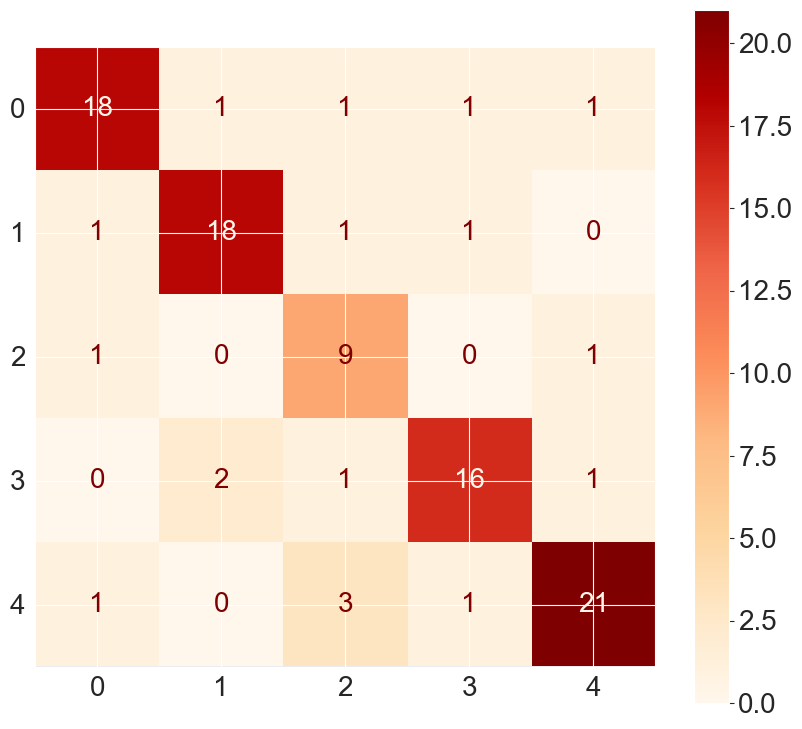

In [45]:
%matplotlib inline
# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (10.0, 9.0)
plt.rcParams['font.size'] = 20
# Implementing visualization of Confusion Matrix
display_c_m = ConfusionMatrixDisplay(c_m, display_labels=category_name)
# Plotting Confusion Matrix
# Setting colour map to be used
display_c_m.plot(cmap='OrRd', xticks_rotation=25)
# Other possible options for colour map are:
# 'autumn_r', 'Blues', 'cool', 'Greens', 'Greys', 'PuRd', 'copper_r'
# Setting fontsize for xticks and yticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Giving name to the plot
plt.title('Confusion Matrix', fontsize=24)
# Saving plot
# plt.savefig('confusion_matrix.png', transparent=True, dpi=500)
# Showing the plot
plt.show()

In [46]:
print(classification_report(y_true, y_predicted))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        22
           1       0.86      0.86      0.86        21
           2       0.60      0.82      0.69        11
           3       0.84      0.80      0.82        20
           4       0.88      0.81      0.84        26

    accuracy                           0.82       100
   macro avg       0.81      0.82      0.81       100
weighted avg       0.83      0.82      0.82       100



In [24]:
# def compute_iou(labels, y_pred):
#     """
#     Computes the IoU for instance labels and predictions.
# 
#     Args:
#         labels (np array): Labels.
#         y_pred (np array): predictions
# 
#     Returns:
#         np array: IoU matrix, of size true_objects x pred_objects.
#     """
# 
#     true_objects = len(np.unique(labels))
#     pred_objects = len(np.unique(y_pred))
# 
#     # Compute intersection between all objects
#     intersection = np.histogram2d(
#         labels.flatten(), y_pred.flatten(), bins=(true_objects, pred_objects)
#     )[0]
# 
#     # Compute areas (needed for finding the union between all objects)
#     area_true = np.histogram(labels, bins=true_objects)[0]
#     area_pred = np.histogram(y_pred, bins=pred_objects)[0]
#     area_true = np.expand_dims(area_true, -1)
#     area_pred = np.expand_dims(area_pred, 0)
# 
#     # Compute union
#     union = area_true + area_pred - intersection
#     iou = intersection / union
# 
#     return iou[1:, 1:]  # exclude background
# 
# def precision_at(threshold, iou):
#     """
#     Computes the precision at a given threshold.
# 
#     Args:
#         threshold (float): Threshold.
#         iou (np array [n_truths x n_preds]): IoU matrix.
# 
#     Returns:
#         int: Number of true positives,
#         int: Number of false positives,
#         int: Number of false negatives.
#     """
#     matches = iou > threshold
#     true_positives = np.sum(matches, axis=1) >= 1  # Correct objects
#     true_negatives = np.sum(matches, axis=0) >= 1  # Missed objects
#     false_negatives = np.sum(matches, axis=1) == 0  # Missed objects
#     false_positives = np.sum(matches, axis=0) == 0  # Extra objects
#     
#     tp, tn, fp, fn = (
#         np.sum(true_positives),
#         np.sum(true_negatives),
#         np.sum(false_positives),
#         np.sum(false_negatives),
#     )
#     return tp, tn, fp, fn
# 
# def iou_map(truths, preds, verbose=0):
#     """
#     Computes the metric for the competition.
#     Masks contain the segmented pixels where each object has one value associated,
#     and 0 is the background.
# 
#     Args:
#         truths (list of masks): Ground truths.
#         preds (list of masks): Predictions.
#         verbose (int, optional): Whether to print infos. Defaults to 0.
# 
#     Returns:
#         float: mAP.
#     """
#     ious = [compute_iou(truth, pred) for truth, pred in zip(truths, preds)]
# 
#     print(ious[0].shape)
# 
#     if verbose:
#         print("Thresh\tTP\tTN\tFP\tFN\tPrec.")
# 
#     prec = []
#     for t in np.arange(0.5, 1.0, 0.05):
#         tps, tns, fps, fns = 0, 0, 0, 0
#         for iou in ious:
#             tp, tn, fp, fn = precision_at(t, iou)
#             tps += tp
#             tns += tn
#             fps += fp
#             fns += fn
# 
#         p = tps / (tps + fps + fns)
#         prec.append(p)
# 
#         if verbose:
#             print("{:1.3f}\t{}\t{}\t{}\t{}\t{:1.3f}".format(t, tps, tns, fps, fns, p))
# 
#     if verbose:
#         print("AP\t-\t-\t-\t{:1.3f}".format(np.mean(prec)))
# 
#     return np.mean(prec)

In [25]:
# iou_map([overlay] * 5, [overlay] * 5, verbose=1)  # This should score 1

In [26]:
# iou_map([overlay] , [pred], verbose=1)